# Preliminaries and Enter Your Ticker Here!

In [2]:
import numpy as np
import pandas as pd

symbol = 'GE'

## Leading Indicators Prices

In [2]:
from iexfinance.stocks import Stock

indicators = ['SPY', 'QQQ']
batch = Stock( indicators )
#batch.get_price()
batch.get_book()

{'QQQ': {'asks': [],
  'bids': [],
  'quote': {'avgTotalVolume': 46869856,
   'calculationPrice': 'close',
   'change': -2.29,
   'changePercent': -0.01343,
   'close': 168.23,
   'closeTime': 1549573200213,
   'companyName': 'Invesco QQQ Trust Series 1',
   'delayedPrice': 168.23,
   'delayedPriceTime': 1549573200250,
   'extendedChange': -0.13,
   'extendedChangePercent': -0.00077,
   'extendedPrice': 168.1,
   'extendedPriceTime': 1549576788700,
   'high': 169.45,
   'iexAskPrice': 0,
   'iexAskSize': 0,
   'iexBidPrice': 0,
   'iexBidSize': 0,
   'iexLastUpdated': 1549576788700,
   'iexMarketPercent': 0.0096,
   'iexRealtimePrice': 168.1,
   'iexRealtimeSize': 800,
   'iexVolume': 402305,
   'latestPrice': 168.23,
   'latestSource': 'Close',
   'latestTime': 'February 7, 2019',
   'latestUpdate': 1549573200213,
   'latestVolume': 41906771,
   'low': 166.95,
   'marketCap': 64726492500,
   'open': 168.94,
   'openTime': 1549549800941,
   'peRatio': None,
   'previousClose': 170.52,


In [82]:
#quotes = batch.get_quote()
quotes = batch.get_book()
DisplayDict = {
    'Last': 'latestPrice',
    '% Change': 'changePercent',
    'Updated at':'latestUpdate'
}

for sym in indicators:
    print(f'---{sym}---')
    for display in DisplayDict:
        if display == 'Updated at':
            tstamp = quotes[sym]["quote"][DisplayDict[display]]
            dt = TimeConvert(datetime.fromtimestamp(tstamp/1e3),'EST')
            print( f'Updated at: {dt.strftime("%d %b %y %H:%M %Z")}')
        else:
            print( f'{display}: {quotes[sym]["quote"][DisplayDict[display]]}')


---SPY---
Last: 270.14
% Change: -0.00953
Updated at: 07 Feb 19 16:00 EST
---QQQ---
Last: 168.23
% Change: -0.01343
Updated at: 07 Feb 19 16:00 EST


In [194]:
batch.get_book()

{'QQQ': {'asks': [],
  'bids': [],
  'quote': {'avgTotalVolume': 50174531,
   'calculationPrice': 'close',
   'change': -2.29,
   'changePercent': -0.01343,
   'close': 168.23,
   'closeTime': 1549573200213,
   'companyName': 'Invesco QQQ Trust Series 1',
   'delayedPrice': 168.23,
   'delayedPriceTime': 1549573200250,
   'extendedChange': -0.13,
   'extendedChangePercent': -0.00077,
   'extendedPrice': 168.1,
   'extendedPriceTime': 1549576788700,
   'high': 169.45,
   'iexAskPrice': 0,
   'iexAskSize': 0,
   'iexBidPrice': 0,
   'iexBidSize': 0,
   'iexLastUpdated': 1549576788700,
   'iexMarketPercent': 0.0096,
   'iexRealtimePrice': 168.1,
   'iexRealtimeSize': 800,
   'iexVolume': 402305,
   'latestPrice': 168.23,
   'latestSource': 'Close',
   'latestTime': 'February 7, 2019',
   'latestUpdate': 1549573200213,
   'latestVolume': 41906771,
   'low': 166.95,
   'marketCap': 64852665000,
   'open': 168.94,
   'openTime': 1549549800941,
   'peRatio': None,
   'previousClose': 170.52,


## Stock Description

In [91]:
from iexfinance.stocks import Stock

myStock = Stock(symbol)

In [92]:
info = myStock.get_company()
lKeyInfo = ['companyName', 'description', 'exchange']

print('--- Company Description ---')
for key in lKeyInfo:
    print(f'{key}: {info[key]}')

--- Company Description ---
companyName: General Electric Company
description: General Electric Co is a digital industrial company. It operates in various segments, including power and water, oil and gas, energy management, aviation, healthcare, transportation, appliances and lighting, and more.
exchange: New York Stock Exchange


In [99]:
stats = myStock.get_key_stats()
lKeyStats = [ 'beta', 'dividendRate', 'exDividendDate',
            'priceToBook', 'priceToSales', 'sharesOutstanding',
            'week52high', 'week52low']

StatsDict = {
    'beta': '{:.2f}',
    'dividendRate': '{:.2f}',
    'exDividendDate': '{}',
    'priceToBook': '{:.2f}',
    'priceToSales':'{:.2f}',
    'sharesOutstanding':'{:,.0f}',
    'week52high': '{:.2f}',
    'week52low': '{:.2f}'
}

print('--- Key Stats ---')
# for key in lKeyStats:
#     print( f'{key}: {stats[key]}')

for key in StatsDict:
    print( f'{key}: {StatsDict[key].format(stats[key])}')

--- Key Stats ---
beta: 1.00
dividendRate: 0.04
exDividendDate: 2018-12-19 00:00:00.0
priceToBook: 2.86
priceToSales: 0.75
sharesOutstanding: 8,698,115,000
week52high: 15.59
week52low: 6.66


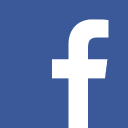

In [31]:
logo = myStock.get_logo()

from IPython.display import Image
Image(logo['url'])

## Market Book
**Need to be tested during market hours**

In [88]:
myStock = Stock(symbol)
book = myStock.get_book()

def PrintBidAsk(quote_dict):
    if not quote_dict['bids'] or not quote_dict['asks']:
        data = quote_dict['quote']
        for side in ['Bid', 'Ask']:
            price = data[f'iex{side}Price']
            size = data[f'iex{side}Size']
            
            if price == 0 or size == 0:
                price = '-'
                size = '-'
            print(f'Last {side}: {price} x {size}')
        
        LastTimestamp = data['iexLastUpdated']
        LastDT = datetime.fromtimestamp(LastTimestamp/1e3)
        LastDTstr = f'{TimeConvert(LastDT, "EST").strftime("%d %b %y %H:%M %Z")}'
        print(f'Updated at: {LastDTstr}')
    
    else:   # Show Live Bid Ask
        for side in ['bids', 'asks']:
            price = quote_dict[side][0]['price']
            size = quote_dict[side][0]['size']
            
            print(f'{side}: {price} x {size}')

In [89]:
PrintBidAsk(book)

Last Bid: - x -
Last Ask: - x -
Updated at: 07 Feb 19 15:59 EST


In [17]:
book

{'asks': [{'price': 166.43, 'size': 200, 'timestamp': 1549292661171},
  {'price': 168, 'size': 121, 'timestamp': 1549291229030},
  {'price': 170.48, 'size': 100, 'timestamp': 1549290943007},
  {'price': 172.09, 'size': 100, 'timestamp': 1549290601954},
  {'price': 175, 'size': 100, 'timestamp': 1549290602657},
  {'price': 178, 'size': 300, 'timestamp': 1549290602660},
  {'price': 180, 'size': 200, 'timestamp': 1549290602651},
  {'price': 200, 'size': 250, 'timestamp': 1549290601922}],
 'bids': [{'price': 166.35, 'size': 100, 'timestamp': 1549292662974},
  {'price': 166.31, 'size': 100, 'timestamp': 1549292650016},
  {'price': 120, 'size': 100, 'timestamp': 1549290606899},
  {'price': 98.44, 'size': 112, 'timestamp': 1549290600062}],
 'quote': {'avgTotalVolume': 28528671,
  'calculationPrice': 'tops',
  'change': 0.72,
  'changePercent': 0.00434,
  'close': 165.71,
  'closeTime': 1549054800529,
  'companyName': 'Facebook Inc.',
  'delayedPrice': 166.57,
  'delayedPriceTime': 15492917606

## Intraday Time Series Tick Data for Consecutive Dates
* for pandas ploting [this](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/) was helpful
* for DateTime objects manipulation, [this](http://strftime.org/) is a good reference

In [57]:
from datetime import datetime, timedelta, date
from iexfinance.stocks import get_historical_intraday
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

tdate = datetime(2019,1,31)
#tdate_neg1 = tdate - timedelta( days = 3)
tdate_neg1 = MarketDateAdj( tdate, -1, 'NYSE')

tdata = get_historical_intraday(symbol, tdate, output_format = 'pandas')
tdata_neg1 = get_historical_intraday(symbol, tdate_neg1, output_format = 'pandas')

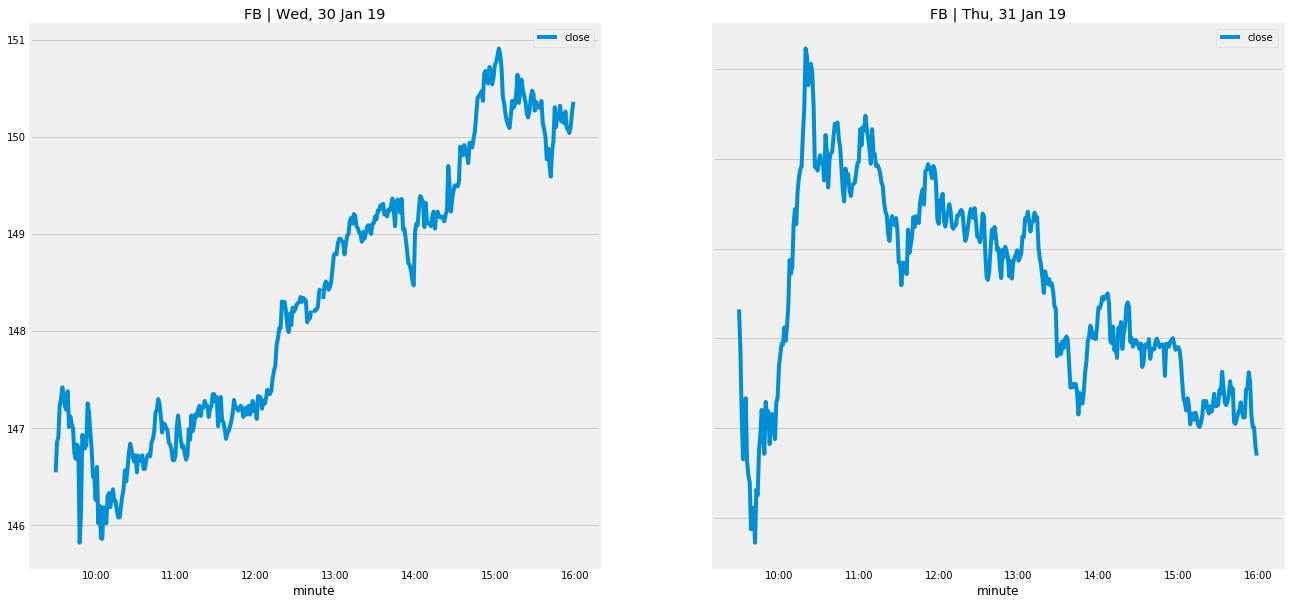

In [58]:
tdata.index = pd.DatetimeIndex( tdata.index )
tdata_neg1.index = pd.DatetimeIndex( tdata_neg1.index)

plot_dict = {
    tdate_neg1 : tdata_neg1,
    tdate : tdata
}

#tdata.plot(y = 'close', title = f'{symbol} {tdate.strftime("%d %b %y")}')

for i, idate in enumerate(plot_dict):
    ax = plt.subplot(1,2, i+1) 
    plot_dict[idate].plot( y = 'close', 
                          title = f'{symbol} | {idate.strftime("%a, %d %b %y")}', 
                         ax = ax, figsize = (20,10),
                         sharey = True)

### Let's join the two Dates' intraday prices into one DF

In [109]:
def DatePlusTime( DateObj, TimeObj):
    '''
    return a DateTime object
    
    requires datetime, time, and timedelta
    '''
    tdelta = datetime.combine( date.min, TimeObj) - datetime.min
    return DateObj  + tdelta

# Turning Time of the DF into DateTime
tdata['DT'] = tdata.index
tdata['DT'] = tdata['DT'].apply(lambda x : DatePlusTime(tdate ,x.time()))

tdata_neg1['DT'] = tdata_neg1.index
tdata_neg1['DT'] = tdata_neg1['DT'].apply(lambda x : DatePlusTime(tdate_neg1 ,x.time()))

# Concat the two day
l_col = ['DT', 'close']
data = pd.concat([tdata[l_col], tdata_neg1[l_col]])
data.index = data['DT']

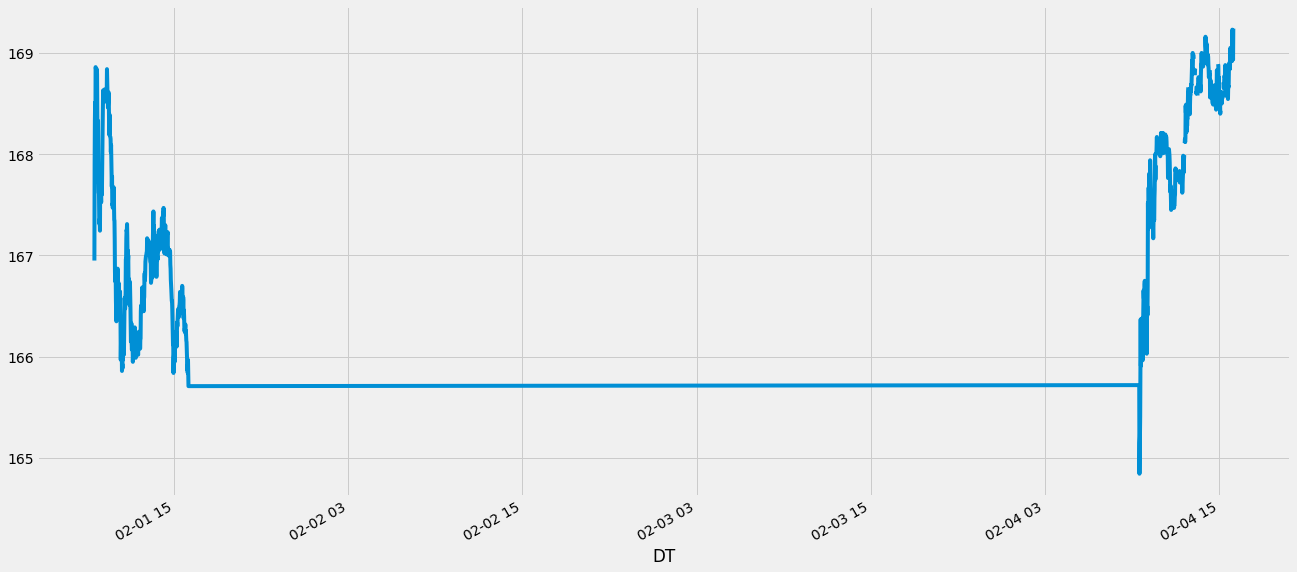

In [112]:
data['close'].plot(figsize=(20,10))

# Market Time and Date Adjust
Let's install some preliminary packages:
* `pandas_market_calendars` [git](https://github.com/rsheftel/pandas_market_calendars) [doc](https://pandas-market-calendars.readthedocs.io/en/latest/usage.html)

In [3]:
from datetime import datetime, time
import pandas_market_calendars as mcal
import pytz

## UTC Time Convert
[Here's](https://www.timeanddate.com/time/aboututc.html) a definition of UTC Time

Function `TimeConvert` inspired by this [stackoverflow post](https://stackoverflow.com/questions/48416511/how-to-convert-utc-to-est-with-python-and-take-care-of-daylight-saving-automatic?noredirect=1&lq=1)

`pytz` documentation is available [here](http://pytz.sourceforge.net/)

In [4]:
def TimeConvert( inDateTime, OutZone):
    from datetime import datetime
    import pytz
    
    #from_zone = pytz.utc
    to_zone = pytz.timezone(OutZone)
    
    return inDateTime.astimezone(to_zone)

let's get a time to test

In [14]:
TimeConvert( datetime.now(), 'UTC')

datetime.datetime(2019, 2, 8, 3, 48, 8, 700067, tzinfo=<UTC>)

In [22]:
myStock = Stock(symbol)
book = myStock.get_book()
utc_timestamp = book['quote']['closeTime']
utc_datetime = datetime.fromtimestamp(utc_timestamp / 1e3)

print(f'Our UTC Time is {utc_datetime.strftime("%d %b %y %H:%M %Z")}')
# %Z is silent if object is naive

Our UTC Time is 07 Feb 19 05:00 


In [23]:
est_datetime = TimeConvert(utc_datetime, 'US/Eastern')
print(f'Our EST Time is {est_datetime.strftime("%d %b %y %H:%M %Z")}')

Our EST Time is 06 Feb 19 16:00 EST


## Is Market Open

In [5]:
def IsMarketOpen(DateTimeObj, ExchangeName, debugmode = False):
    import pandas_market_calendars as mcal
    from pandas.tseries.offsets import BDay
    
    mkt = mcal.get_calendar(ExchangeName)
    tDateTime = TimeConvert(DateTimeObj, 'UTC')
    tDate = tDateTime.date()
    dateRange = pd.bdate_range( start = tDate - BDay(1), end = tDate + BDay(1))
    mkt_hours = mkt.schedule( start_date = dateRange[0], end_date = dateRange[-1])
    
    if debugmode:
        print(f'Current time UTC: {tDateTime}')
        print(mkt_hours)
    
    return mkt.open_at_time( schedule = mkt_hours, timestamp = tDateTime, include_close = True)

In [37]:
IsMarketOpen( datetime(2019, 2, 18, 13,4, tzinfo = pytz.timezone('EST')), 'NYSE')

False

In [38]:
IsMarketOpen( datetime(2019, 2, 19, 22,34, tzinfo = pytz.timezone(pytz.country_timezones('HK')[0])), 'NYSE')

True

In [36]:
IsMarketOpen( datetime(2019, 2, 7, 9,31, tzinfo = pytz.timezone('EST')), 'NYSE', debugmode = True)

Current time UTC: 2019-02-07 14:31:00+00:00
                         market_open              market_close
2019-02-06 2019-02-06 14:30:00+00:00 2019-02-06 21:00:00+00:00
2019-02-07 2019-02-07 14:30:00+00:00 2019-02-07 21:00:00+00:00
2019-02-08 2019-02-08 14:30:00+00:00 2019-02-08 21:00:00+00:00


True

## Market Date Adjust

In [6]:
def MarketDateAdj( DateObj, IntBusinessDays , ExchangeName):
    from datetime import datetime, time, timedelta
    import pandas_market_calendars as mcal
    from pandas.tseries.offsets import BDay
    
    mkt = mcal.get_calendar(ExchangeName)
    holidays = mkt.holidays()
    
    inDay = DateObj.date()
    outDay = inDay + BDay(IntBusinessDays)
    
    while outDay in holidays.holidays:
        outDay += BDay( np.sign(IntBusinessDays) * 1)

    return outDay
    

Time for a test, `Feb 18, 2019` is a market holiday in NYSE

In [43]:
newdate = MarketDateAdj( datetime(2019, 2, 7), IntBusinessDays= 7, ExchangeName='NYSE')
newdate

Timestamp('2019-02-19 00:00:00')

## Market Timer
`days_hours_mins_secs` from this [source](https://stackoverflow.com/questions/2119472/convert-a-timedelta-to-days-hours-and-minutes)

In [7]:
def days_hours_mins_secs( TimeDeltaObj):
    '''
    Note that in Python 3 // is for integer division
    '''
    td = TimeDeltaObj
    hours, remainder = divmod( td.seconds, 3600)
    minutes, seconds = divmod( remainder, 60)

    return td.days, hours, minutes, seconds

def GetTimeToMktOpen( DateTimeObj, ExchangeName, debugmode = False):
    import pandas_market_calendars as mcal
    from datetime import timedelta
    
    # let's standardize time to UTC
    dt_now = TimeConvert(DateTimeObj, 'UTC')
    mkt = mcal.get_calendar(ExchangeName)
    sch = mkt.schedule( start_date = dt_now.date(), 
                           end_date = MarketDateAdj(dt_now, 1, ExchangeName))
    
    close_time = sch['market_close'][0]
    
    # determine today's open or next day's open
    l_which_open = [h > dt_now for h in sch['market_open']]
    if l_which_open[0]:
        open_time = sch['market_open'][0]
    else:
        open_time = sch['market_open'][1]
    
    if IsMarketOpen(DateTimeObj, ExchangeName):
        # Show Time to Market Close
        tdelta = close_time.to_pydatetime() - dt_now
        
        if debugmode :
            print( f'--- Market is Open ---\nClose Time is {close_time}, Time Now is {dt_now}')
        
        return { 'status': 'open', 'd-h-m-s': days_hours_mins_secs(tdelta)}
    else:
        # Show Time to Next Market Open
        tdelta = open_time.to_pydatetime() - dt_now
        if debugmode :
            print( f'--- Market is Closed ---\nNext Open Time is {open_time}, Time Now is {dt_now}')
            print( f'\n--- Market Open Time ---\n{sch["market_open"]}')
            
        return { 'status': 'closed', 'd-h-m-s': days_hours_mins_secs(tdelta)}

### let's test if it works during market hours

In [46]:
# right after Market Open
dt_now = datetime(2019, 2, 7, 9, 30, tzinfo = pytz.timezone('EST'))#datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Open ---
Close Time is 2019-02-07 21:00:00+00:00, Time Now is 2019-02-07 14:30:00+00:00


{'d-h-m-s': (0, 6, 30, 0), 'status': 'open'}

In [47]:
# right before Market Close
dt_now = datetime(2019, 2, 7, 15, 59, tzinfo = pytz.timezone('US/Eastern'))#datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Open ---
Close Time is 2019-02-07 21:00:00+00:00, Time Now is 2019-02-07 20:55:00+00:00


{'d-h-m-s': (0, 0, 5, 0), 'status': 'open'}

### let's test when market is closed

In [50]:
# just before open
dt_now = datetime(2019, 2, 7, 9, 29, tzinfo = pytz.timezone('EST'))#datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Closed ---
Next Open Time is 2019-02-07 14:30:00+00:00, Time Now is 2019-02-07 14:29:00+00:00

--- Market Open Time ---
2019-02-07   2019-02-07 14:30:00+00:00
2019-02-08   2019-02-08 14:30:00+00:00
Freq: C, Name: market_open, dtype: datetime64[ns, UTC]


{'d-h-m-s': (0, 0, 1, 0), 'status': 'closed'}

In [51]:
# just after close
dt_now = datetime(2019, 2, 7, 16, 1, tzinfo = pytz.timezone('EST'))#datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Closed ---
Next Open Time is 2019-02-08 14:30:00+00:00, Time Now is 2019-02-07 21:01:00+00:00

--- Market Open Time ---
2019-02-07   2019-02-07 14:30:00+00:00
2019-02-08   2019-02-08 14:30:00+00:00
Freq: C, Name: market_open, dtype: datetime64[ns, UTC]


{'d-h-m-s': (0, 17, 29, 0), 'status': 'closed'}

how about now

In [52]:
dt_now = datetime.now(pytz.utc)
GetTimeToMktOpen( dt_now, 'NYSE', debugmode= True)

--- Market is Closed ---
Next Open Time is 2019-02-08 14:30:00+00:00, Time Now is 2019-02-08 04:02:22.931198+00:00

--- Market Open Time ---
2019-02-08   2019-02-08 14:30:00+00:00
2019-02-11   2019-02-11 14:30:00+00:00
Freq: C, Name: market_open, dtype: datetime64[ns, UTC]


{'d-h-m-s': (0, 10, 27, 37), 'status': 'closed'}

### Market Clock Live Demo

In [12]:
exchange = 'NYSE'
MktTimeDict = GetTimeToMktOpen( datetime.now(pytz.utc), exchange)
d,h,m,s = MktTimeDict['d-h-m-s']

if MktTimeDict['status'] == 'open':
    nextAction = f'until {exchange} close'
else:
    nextAction = f'until {exchange} open'

msg = f'{h}:{"{:02d}".format(m)}:{"{:02d}".format(s)}'
if d > 0:
    msg = f'{d} days {msg}'
    
print(f'{msg} {nextAction}')

6:00:25 until NYSE open


## Get Next Trade Date

In [9]:
closed_dt = datetime(2019, 2, 1, 18,0, tzinfo = pytz.timezone('EST'))
closed_dt

datetime.datetime(2019, 2, 1, 18, 0, tzinfo=<StaticTzInfo 'EST'>)

In [10]:
IsMarketOpen(closed_dt,'NYSE')

False

In [11]:
MarketDateAdj(closed_dt, 1, 'NYSE')

Timestamp('2019-02-04 00:00:00')